In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, ensemble, neighbors, model_selection, metrics

In [2]:
sb.set()

sp = spotipy.Spotify()
        
cid = "6d49981d346842a1844ab1612afae8ba"
csec = "e33407ff688c4d48908d5f5286fe8e41"


client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=csec)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [143]:


playlist_tracks = sp.user_playlist_tracks('22b7g6udnfkubfplnsla3ww5a', '7pF07PQEdD4e0AEoo6ue9G', fields='items,uri,name,id,total', market='fr')

name = []
date = []
pop = []
dance = []
energy = []
loud = []
speech = []
acous = []
live = []
valence = []
tempo = []
win = []

for i in playlist_tracks['items']:
    name.append(i['track']['name'])
    date.append(i['track']['album']['release_date'])
    pop.append(i['track']['popularity'])
    dance.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['danceability'])
    energy.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['energy'])
    loud.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['loudness'])
    speech.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['speechiness'])
    acous.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['acousticness'])
    live.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['liveness'])
    valence.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['valence'])
    tempo.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['tempo'])
    win.append(1)
    
    
playlist_tracks = sp.user_playlist_tracks('22b7g6udnfkubfplnsla3ww5a', '4OzkYLxp0VzMNlYBXq2faU', fields='items,uri,name,id,total', market='fr')
for i in playlist_tracks['items']:
    name.append(i['track']['name'])
    date.append(i['track']['album']['release_date'])
    pop.append(i['track']['popularity'])
    dance.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['danceability'])
    energy.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['energy'])
    loud.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['loudness'])
    speech.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['speechiness'])
    acous.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['acousticness'])
    live.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['liveness'])
    valence.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['valence'])
    tempo.append(sp.audio_features('spotify:track:'+i['track']['id'])[0]['tempo'])
    win.append(0)

songdata = pd.DataFrame()
songdata.insert(0, "Name", name, True)
songdata.insert(1, "Date Released", date, True)
songdata.insert(2, "Popularity", pop, True)
songdata.insert(3, "Danceability", dance, True)
songdata.insert(4, "Energy", energy, True)
songdata.insert(5, "Loudness", loud, True)
songdata.insert(6, "Speechiness", speech, True)
songdata.insert(7, "Acousticness", acous, True)
songdata.insert(8, "Liveness", live, True)
songdata.insert(9, "Valence", valence, True)
songdata.insert(10, "Tempo", tempo, True)
songdata.insert(11, "Did They Win?", win, True)


songdata
# songdata.to_csv('topsongs.csv', encoding='utf-8', index=False)


# sp.trace = True # turn on tracing
# sp.trace_out = True # turn on trace out

# urn = 'spotify:artist:3jOstUTkEu2JkjvRdBA5Gu'
# # artist = sp.artist(urn)
# # print(artist.get('popularity'))

# track_uri = 'spotify:track:35xSkNIXi504fcEwz9USRB'
# #track = sp.track(track_uri)
# #print(track)
# print (sp.audio_analysis(track_uri))

retrying ...1secs


In [144]:
playlist_albums = sp.user_playlist_tracks('22b7g6udnfkubfplnsla3ww5a', '3q7RrjHTPcG1pAL3j4QcJF', fields='items,uri,name,id,total', market='fr')
playlist_albums

albums = ['2dqn5yOQWdyGwOpOIi9O4x']
name = ['Fearless']
date = []
pop = []
dance = []
energy = []
loud = []
speech = []
acous = []
live = []
valence = []
tempo = []
win = []

for i in playlist_albums['items']:
    name.append(i['track']['album']['name'])
    date.append(i['track']['album']['release_date'])
    pop.append(i['track']['popularity'])
    win.append(1)
    albums.append(i['track']['album']['id'])

del albums[1]
del name[1]

danceavg = 0
energyavg = 0
loudavg = 0
speechavg = 0
acousavg = 0
liveavg = 0
valenceavg = 0
tempoavg = 0
count = 0

for a in albums:
    songs = sp.album_tracks(a)
    for i in songs['items']:
        danceavg = danceavg + sp.audio_features('spotify:track:'+i['id'])[0]['danceability']
        energyavg = energyavg + sp.audio_features('spotify:track:'+i['id'])[0]['energy']
        loudavg = loudavg + sp.audio_features('spotify:track:'+i['id'])[0]['loudness']
        speechavg = speechavg + sp.audio_features('spotify:track:'+i['id'])[0]['speechiness']
        acousavg = acousavg + sp.audio_features('spotify:track:'+i['id'])[0]['acousticness']
        liveavg = liveavg + sp.audio_features('spotify:track:'+i['id'])[0]['liveness']
        valenceavg = valenceavg + sp.audio_features('spotify:track:'+i['id'])[0]['valence']
        tempoavg = tempoavg + sp.audio_features('spotify:track:'+i['id'])[0]['tempo']
        count = count + 1
    dance.append(danceavg/count)
    energy.append(energyavg/count)
    loud.append(loudavg/count)
    speech.append(speechavg/count)
    acous.append(acousavg/count)
    live.append(liveavg/count)
    valence.append(valenceavg/count)
    tempo.append(tempoavg/count)
    danceavg = 0
    energyavg = 0
    loudavg = 0
    speechavg = 0
    acousavg = 0
    liveavg = 0
    valenceavg = 0
    tempoavg = 0
    count = 0
    
playlist_albums = sp.user_playlist_tracks('22b7g6udnfkubfplnsla3ww5a', '6ua8ZJ16YFgCou0ecqPgdV', fields='items,uri,name,id,total', market='fr')
playlist_albums

albums = []

for i in playlist_albums['items']:
    name.append(i['track']['album']['name'])
    date.append(i['track']['album']['release_date'])
    pop.append(i['track']['popularity'])
    win.append(0)
    albums.append(i['track']['album']['id'])

danceavg = 0
energyavg = 0
loudavg = 0
speechavg = 0
acousavg = 0
liveavg = 0
valenceavg = 0
tempoavg = 0
count = 0

    
for a in albums:
    songs = sp.album_tracks(a)
    for i in songs['items']:
        danceavg = danceavg + sp.audio_features('spotify:track:'+i['id'])[0]['danceability']
        energyavg = energyavg + sp.audio_features('spotify:track:'+i['id'])[0]['energy']
        loudavg = loudavg + sp.audio_features('spotify:track:'+i['id'])[0]['loudness']
        speechavg = speechavg + sp.audio_features('spotify:track:'+i['id'])[0]['speechiness']
        acousavg = acousavg + sp.audio_features('spotify:track:'+i['id'])[0]['acousticness']
        liveavg = liveavg + sp.audio_features('spotify:track:'+i['id'])[0]['liveness']
        valenceavg = valenceavg + sp.audio_features('spotify:track:'+i['id'])[0]['valence']
        tempoavg = tempoavg + sp.audio_features('spotify:track:'+i['id'])[0]['tempo']
        count = count + 1
    dance.append(danceavg/count)
    energy.append(energyavg/count)
    loud.append(loudavg/count)
    speech.append(speechavg/count)
    acous.append(acousavg/count)
    live.append(liveavg/count)
    valence.append(valenceavg/count)
    tempo.append(tempoavg/count)
    danceavg = 0
    energyavg = 0
    loudavg = 0
    speechavg = 0
    acousavg = 0
    liveavg = 0
    valenceavg = 0
    tempoavg = 0
    count = 0

albumdata = pd.DataFrame()
albumdata.insert(0, "Name", name, True)
albumdata.insert(1, "Date Released", date, True)
albumdata.insert(2, "Popularity", pop, True)
albumdata.insert(3, "Danceability", dance, True)
albumdata.insert(4, "Energy", energy, True)
albumdata.insert(5, "Loudness", loud, True)
albumdata.insert(6, "Speechiness", speech, True)
albumdata.insert(7, "Acousticness", acous, True)
albumdata.insert(8, "Liveness", live, True)
albumdata.insert(9, "Valence", valence, True)
albumdata.insert(10, "Tempo", tempo, True)
albumdata.insert(11, "Did They Win?", win, True)

albumdata

retrying ...1secs


,Name,Date Released,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo,Did They Win?
0,Fearless,2008-11-10,60,0.592769,0.637308,-5.276000,0.032992,0.175937,0.145554,0.384231,113.235462,1
1,The Suburbs,2010,70,0.448625,0.721381,-7.534563,0.045250,0.217593,0.205238,0.418344,127.591062,1
2,21,2011-01-19,77,0.581091,0.534091,-6.081727,0.036018,0.439371,0.117536,0.414636,133.496909,1
3,Babel,2012-09-21,52,0.404250,0.558167,-8.333750,0.038817,0.185863,0.127025,0.281533,116.001083,1
4,Random Access Memories,2013-05-17,64,0.686462,0.585846,-10.704077,0.044315,0.287906,0.132877,0.488231,114.471077,1
5,Morning Phase,2014-01-01,47,0.463354,0.399923,-9.842538,0.030169,0.430708,0.125154,0.220692,114.185923,1
6,1989,2014-01-01,71,0.650231,0.698769,-6.236462,0.066254,0.113175,0.154577,0.461908,118.552462,1
7,25,2015-11-20,74,0.484636,0.499818,-6.171909,0.043718,0.368573,0.148036,0.294091,130.332000,1
8,24K Magic,2016-11-17,83,0.690556,0.690333,-5.385222,0.066989,0.042790,0.135267,0.695889,136.310111,1
9,Golden Hour,2018-03-30,72,0.613692,0.534385,-7.148846,0.036200,0.412438,0.109492,0.459615,108.531462,1


In [4]:
playlist_artists = sp.user_playlist_tracks('22b7g6udnfkubfplnsla3ww5a', '6Wu1dIW3n13jsx0WoODnlQ', fields='items,uri,name,id,total', market='fr')
playlist_artists

name = []
followers = []
pop = []
win = []

for i in playlist_artists['items']:
    name.append(i['track']['album']['artists'][0]['name'])
    artist = sp.artist(i['track']['album']['artists'][0]['id'])
    followers.append(artist['followers']['total'])
    pop.append(artist['popularity'])
    win.append(1)
    
playlist_artists = sp.user_playlist_tracks('22b7g6udnfkubfplnsla3ww5a', '6ua8ZJ16YFgCou0ecqPgdV', fields='items,uri,name,id,total', market='fr')
playlist_artists

for i in playlist_artists['items']:
    name.append(i['track']['album']['artists'][0]['name'])
    artist = sp.artist(i['track']['album']['artists'][0]['id'])
    followers.append(artist['followers']['total'])
    pop.append(artist['popularity'])
    win.append(0) 

    
artistdata = pd.DataFrame()
artistdata.insert(0, "Name", name, True)
artistdata.insert(1, "Followers", followers, True)
artistdata.insert(2, "Popularity", pop, True)
artistdata.insert(3, "Did They Win", win, True)

artistdata
# artistdata.to_csv('topartists.csv', encoding='utf-8', index=False)


In [8]:
songdata

,Name,Date Released,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo,Did They Win?
0,Single Ladies (Put a Ring on It),2008-11-14,71,0.426,0.584,-5.293,0.2960,0.03830,0.1880,0.272,193.437,1
1,Need You Now,2010-01-01,69,0.587,0.622,-5.535,0.0303,0.09270,0.2000,0.231,107.943,1
2,Rolling in the Deep,2011-01-19,77,0.730,0.770,-5.114,0.0298,0.13800,0.0473,0.507,104.948,1
3,We Are Young (feat. Janelle Monáe),2012-02-14,75,0.378,0.638,-5.576,0.0750,0.02000,0.0849,0.735,184.086,1
4,Royals,2013-01-01,79,0.674,0.428,-9.504,0.1220,0.12100,0.1320,0.337,84.878,1
5,Stay With Me,2014-01-01,85,0.418,0.420,-6.444,0.0414,0.58800,0.1100,0.184,84.094,1
6,Thinking out Loud,2014-06-21,84,0.781,0.445,-6.061,0.0295,0.47400,0.1840,0.591,78.998,1
7,Hello,2015-11-20,74,0.470,0.431,-6.129,0.0342,0.32900,0.0854,0.289,157.980,1
8,That's What I Like,2016-11-17,83,0.853,0.560,-4.961,0.0406,0.01300,0.0944,0.860,134.066,1
9,This Is America,2018-05-06,77,0.854,0.463,-6.159,0.1370,0.11700,0.3540,0.549,120.024,1


In [2]:
from sklearn import tree
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [3]:
# Pulls data from csv files

songdb = pd.read_csv("topsongs.csv")
albumdb = pd.read_csv("topalbums.csv")
artistdb = pd.read_csv("topartists.csv")


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

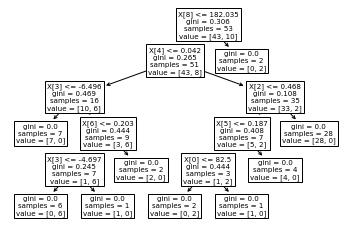

In [4]:
# Top songs predictions

# Splits the dataset into the parameters and the target (whether or not it has more than 10 rings)
# Also removes the gender column as it is a categorical var
song_data = songdb.copy().iloc[:,2:-1]
song_target = songdb.copy().iloc[:,-1:]

# Splits the data and target datasets into training and testing, at 7:3 split. Uses random seed to pick and choose data
# X_train, X_test, y_train, y_test = train_test_split(song_data, song_target, test_size=0.3, random_state=109)

# Fits decision tree and linear SVC model
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(song_data, song_target.values.ravel())
tree.plot_tree(dt_clf.fit(song_data, song_target.values.ravel())) 

linear_svc = svm.SVC(kernel='linear', gamma='auto')
linear_svc.fit(song_data, song_target.values.ravel())

In [ ]:
# Top artist predictions
artist_data = artistdb.copy().iloc[:,1:-1]
artist_target = artistdb.copy().iloc[:,-1:]
# artist_data

# Splits the data and target datasets into training and testing, at 7:3 split. Uses random seed to pick and choose data
X_train, X_test, y_train, y_test = train_test_split(artist_data, artist_target, test_size=0.2, random_state=109)

# Fits decision tree and linear SVC model
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train.values.ravel())
# tree.plot_tree(dt_clf.fit(song_data, song_target.values.ravel())) 

linear_svc = svm.SVC(kernel='linear', gamma='auto')
linear_svc.fit(X_train, y_train.values.ravel())

h = 5000 # Step size for mesh graph

# Graphs
x_min, x_max = X_test['Followers'].min()-.1, X_test['Followers'].max()+.1
y_min, y_max = X_test['Popularity'].min()-.1, X_test['Popularity'].max()+.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
          'Decision Tree']
pl.set_cmap(pl.cm.Paired)

# Plots out results
for i, clf in enumerate((linear_svc, dt_clf)):
    # Plot the decision boundary
    predict = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    predict = predict.reshape(xx.shape)
    pl.set_cmap(pl.cm.Paired)
    pl.contourf(xx, yy, predict, cmap=plt.cm.Blues)
    pl.axis('tight')

    pl.scatter(X_test['Followers'], X_test['Popularity'], c=y_test.values.ravel(), cmap=plt.cm.Blues)
    pl.xlabel('Followers')
    pl.ylabel('Popularity')
    pl.show()
